In [73]:
import pandas as pd

df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [75]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [76]:
# Find how many null values are in the dataset
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [77]:
# Find value counts + uniqueness
for col in df.columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print(f"Number of unique values in {col}: {df[col].nunique()}")

Value counts for class:
class
e    4208
p    3916
Name: count, dtype: int64
Number of unique values in class: 2
Value counts for cap-shape:
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
Number of unique values in cap-shape: 6
Value counts for cap-surface:
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
Number of unique values in cap-surface: 4
Value counts for cap-color:
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
Number of unique values in cap-color: 10
Value counts for bruises:
bruises
f    4748
t    3376
Name: count, dtype: int64
Number of unique values in bruises: 2
Value counts for odor:
odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
Number of unique values in odor: 9
Value counts for gill-attachment:
gill-attachment
f    7914
a     210
Na

In [78]:
# Measure how much knowing a feature reduces uncertainty about the class
from sklearn.feature_selection import mutual_info_classif

X = pd.get_dummies(df.drop("class", axis=1))
y = df["class"].map({"e": 0, "p": 1})

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_series.head(10))

odor_n                        0.364404
odor_f                        0.252793
stalk-surface-above-ring_k    0.194249
stalk-surface-below-ring_k    0.181604
gill-color_b                  0.180417
gill-size_b                   0.161735
gill-size_n                   0.161287
ring-type_p                   0.152183
spore-print-color_h           0.145778
bruises_t                     0.137744
dtype: float64


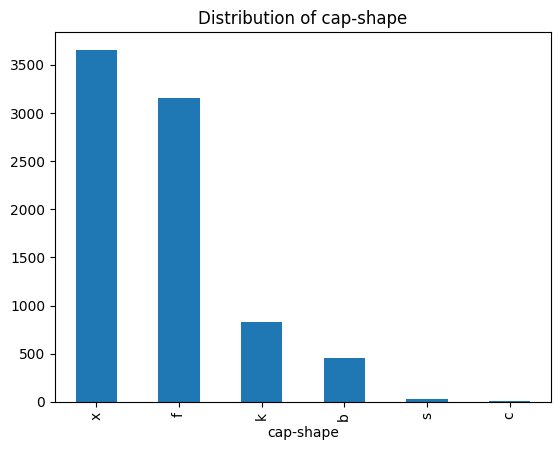

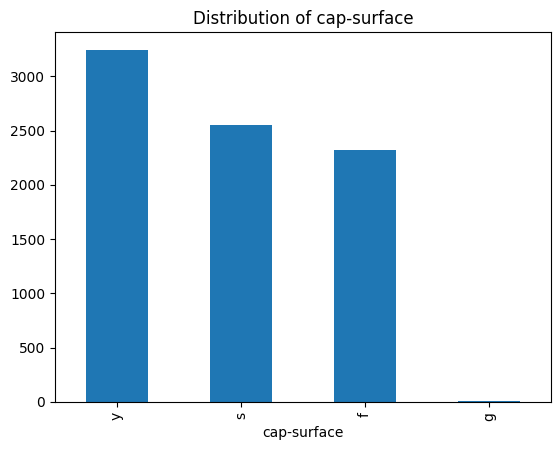

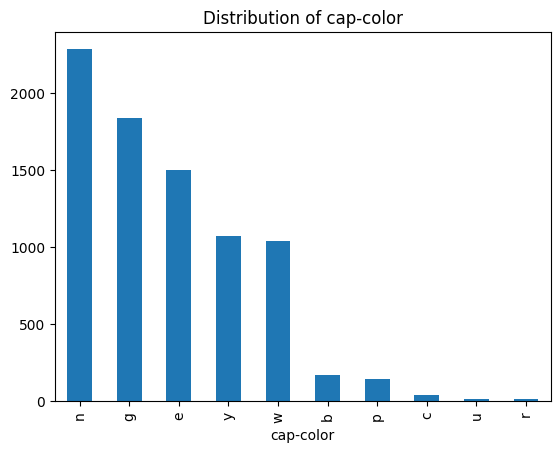

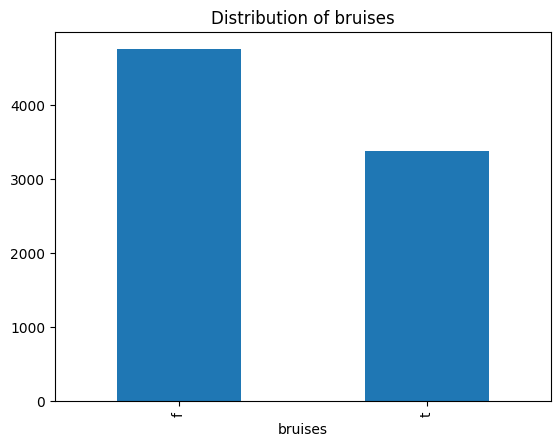

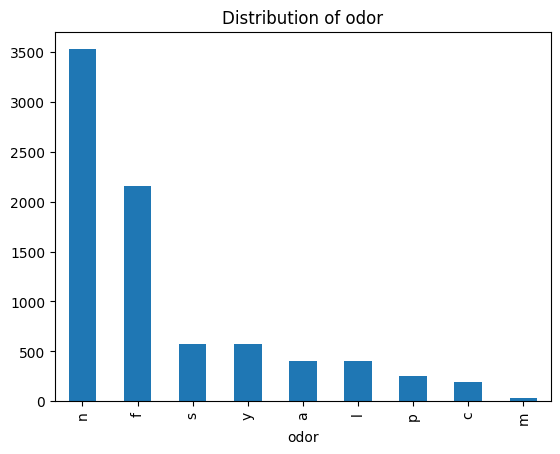

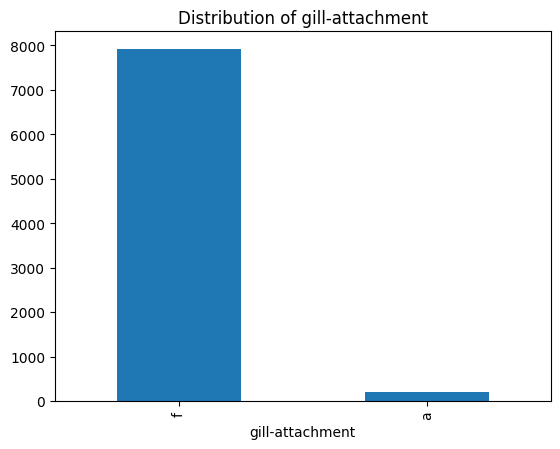

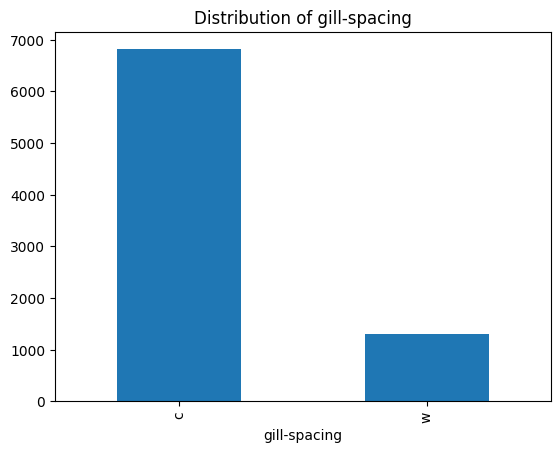

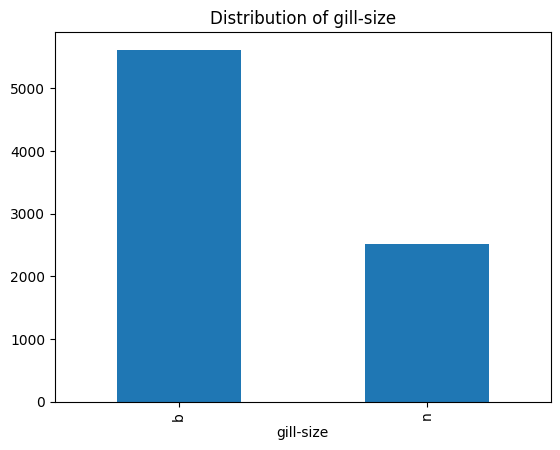

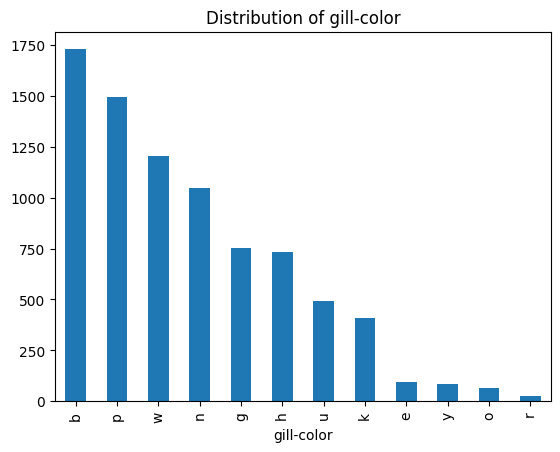

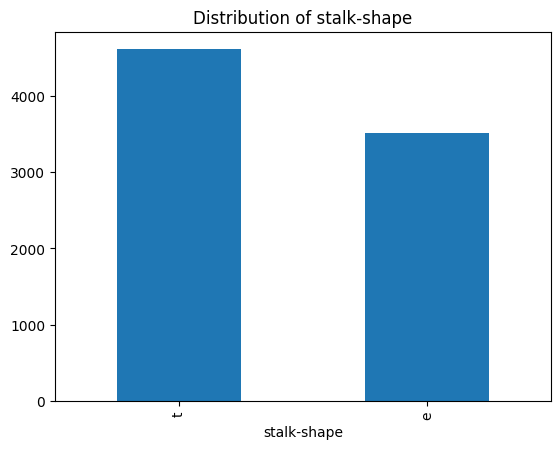

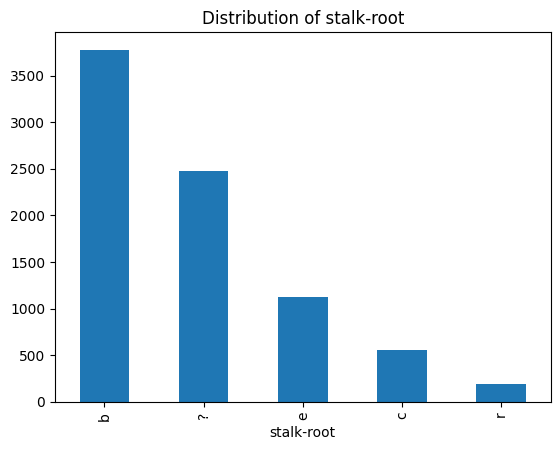

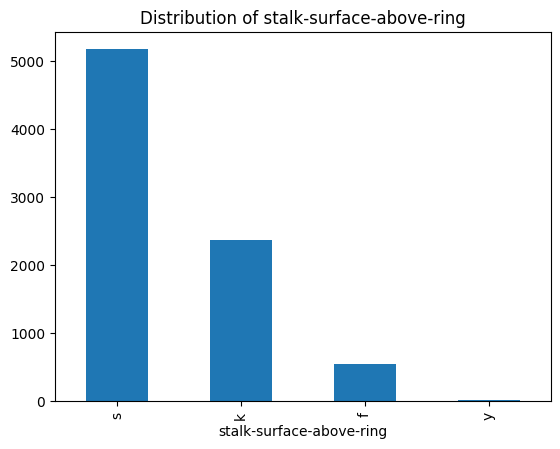

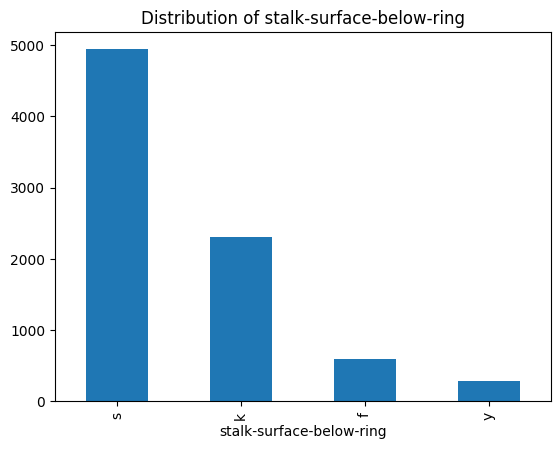

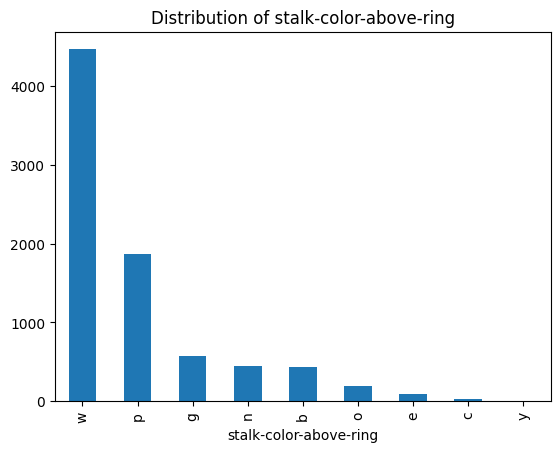

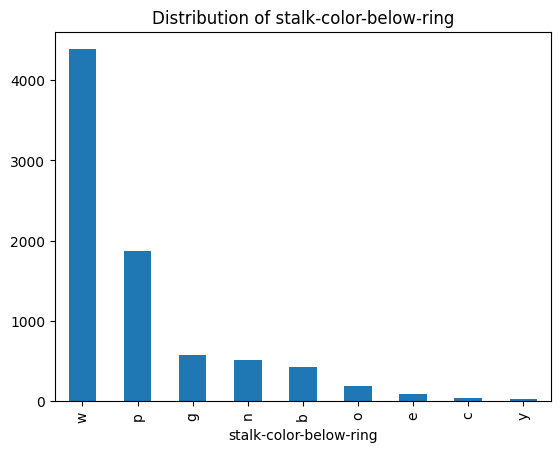

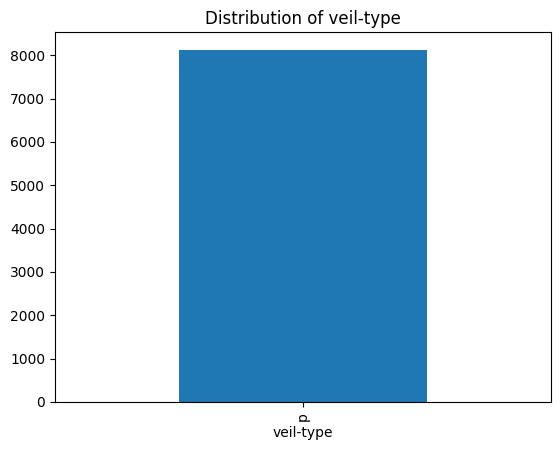

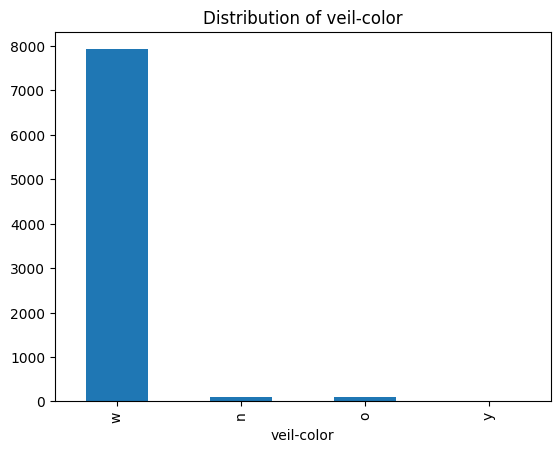

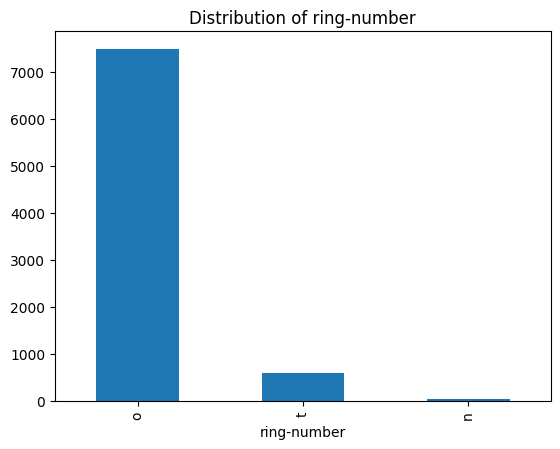

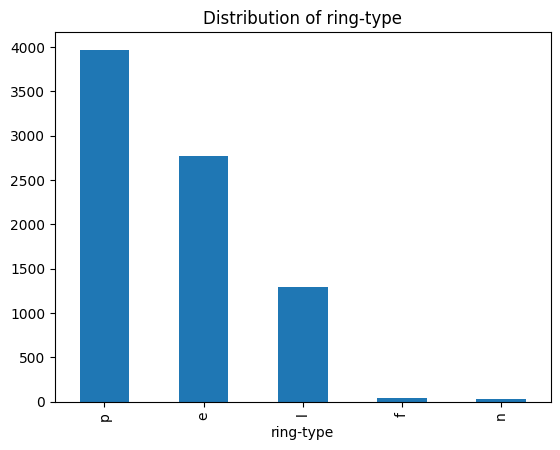

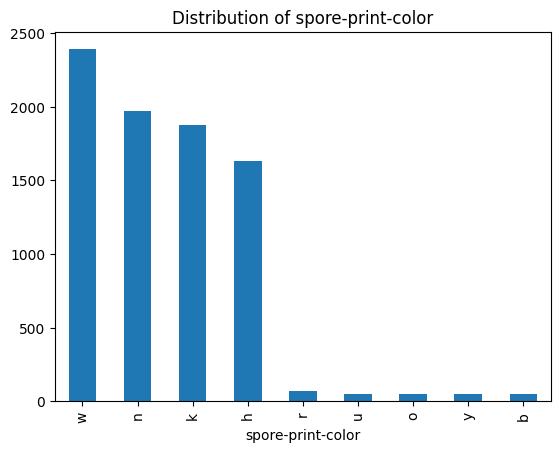

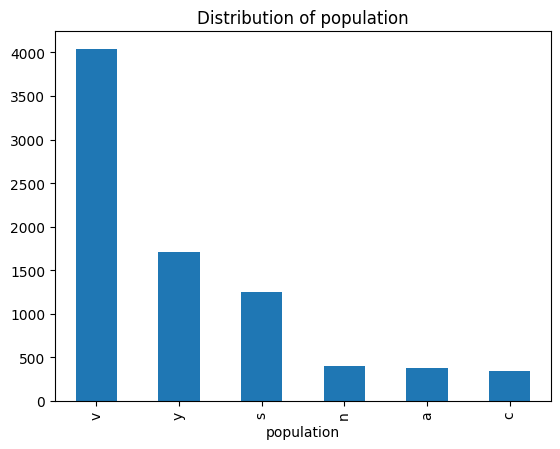

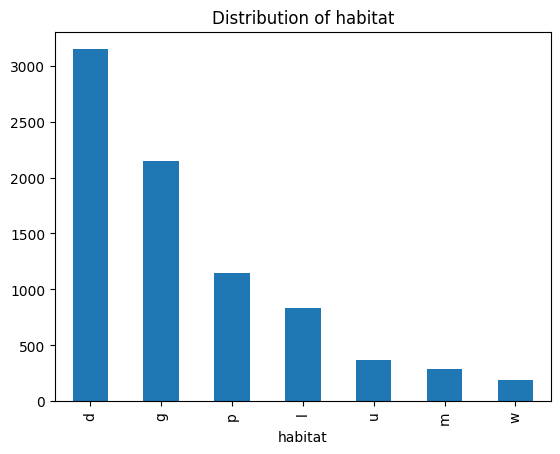

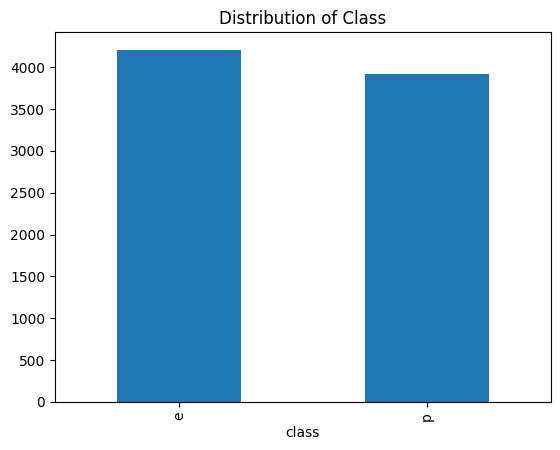

In [79]:
from matplotlib import pyplot as plt

# Plot categorical distributions
X = df.drop("class", axis=1)
y = df["class"]

# Plot distributions for each categorical feature
for col in X.columns:
    X[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.show()

# Plot distributions for each class
y.value_counts().plot(kind="bar")
plt.title("Distribution of Class")
plt.show()